In [6]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as pyplot

# Device conf
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    print("Running on CPU")

print(f"PyTorch version: {torch.__version__}, Device: {device}")

PyTorch version: 2.3.1, Device: mps


Downloading...
Data Loaded Successfully: torch.Size([64, 1, 32, 32]), torch.Size([64])


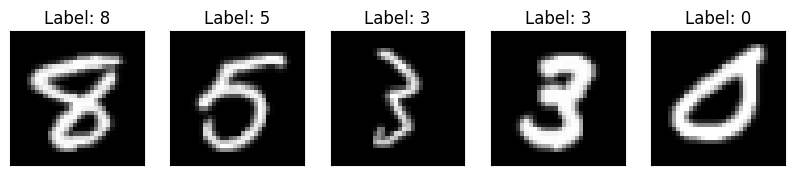

In [7]:
def get_data_loader(batch_size=64):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Downloading dataset
    print("Downloading...")
    train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

    # Building data loaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader


# Testing the data loader
if __name__ == "__main__":
    train_loader, test_loader = get_data_loader()
    data_iter = iter(train_loader)
    images, labels = next(data_iter)

    print(f"Data Loaded Successfully: {images.shape}, {labels.shape}")

    figure = pyplot.figure(figsize=(10, 4))
    for i in range(5):
        ax = figure.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        img = images[i].numpy().transpose((1, 2, 0))
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f"Label: {labels[i].item()}")
    pyplot.show()

In [10]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.c1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.s2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.c3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.s4 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.c5 = nn.Linear(16 * 5 * 5, 120)
        self.f6 = nn.Linear(120, 84)
        self.output = nn.Linear(84, 10)
        self.act = nn.Tanh()

    def forward(self, x):
        x = self.act(self.c1(x))
        x = self.s2(x)
        x = self.act(self.c3(x))
        x = self.s4(x)
        x = x.view(x.size(0), -1)
        x = self.act(self.c5(x))
        x = self.act(self.f6(x))
        x = self.output(x)

        return x


if __name__ == "__main__":
    if torch.backends.mps.is_available():
        device = torch.device("mps")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")

    model = LeNet5().to(device)
    print("✅ Model Architecture Created:")
    print(model)

    dummy_input = torch.randn(1, 1, 32, 32).to(device)

    output = model(dummy_input)

    print(f"\n✅ Output Shape: {output.shape}")

    if output.shape == torch.Size([1, 10]):
        print("🎉 Success! Dimensions are correct. Ready for training.")
    else:
        print("❌ Error: Dimensions do not match [1, 10]. Check calculations.")

✅ Model Architecture Created:
LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (s2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (s4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c5): Linear(in_features=400, out_features=120, bias=True)
  (f6): Linear(in_features=120, out_features=84, bias=True)
  (output): Linear(in_features=84, out_features=10, bias=True)
  (act): Tanh()
)

✅ Output Shape: torch.Size([1, 10])
🎉 Success! Dimensions are correct. Ready for training.
